- lạm phát: https://fred.stlouisfed.org/series/CPIAUCSL#
- lãi suất: https://fred.stlouisfed.org/series/FEDFUNDS#

# introduction

# about data

file
- gold_5y_1d.csv: giá vàng trong nhiều năm từ 2020 đến 2025

### Bảng dữ liệu giá vàng

|INPUTS	       | Description |
|------------|------------|
|Date | thời gian giao dịch (ngày)   |
| Close | giá đóng cửa    |
| Hight | giá cao     |
| Low | giá thấp     |
| Volume | số lượng giao dịch     |
| open | giá mở cửa     |

- df_fed_gold.csv: giá vàng và dữ liệu lãi suất điều hành của FED tính theo quý

|INPUTS	       | Description |
|------------|------------|
|observation_date | thời gian giao dịch (quý)   |
| FEDFUNDS | lãi suất    |
| year | năm     |
| quarter_number | quý     |
| quarter | quý năm     |
| avg_close_price | giá vàng trung bình theo quý    |

- df_fed_cpi_gold.csv:  dữ liệu giá vàng, lãi suất, lạm phát tính theo quý


|INPUTS	       | Description |
|------------|------------|
|observation_date_x | thời gian giao dịch (quý)   |
| FEDFUNDS | lãi suất    |
| year_x | năm     |
| quarter_number_x | quý    |
| quarter | quý năm    |
| CPIAUCSL | lạm phát    |
| avg_close_price | giá vàng trung bình theo quý    |

# begin

In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# nhu cầu vàng trên thế giới

In [115]:
df3 = pd.read_csv('data/tieu_thu_vang.csv')
df3.head()


,country,Q1_20,Q2_20,Q3_20,Q4_20,Q1_21,Q2_21,Q3_21,Q4_21,Q1_22,...,Q1_23,Q2_23,Q3_23,Q4_23,Q1_24,Q2_24,Q3_24,Q4_24,Q1_25,Q2_25
0,India,101.9,63.7,94.6,186.2,165.8,119.6,168.0,343.9,135.5,...,126.3,158.1,210.2,266.3,139.0,149.7,248.3,265.8,118.1,134.9
1,Pakistan,11.3,2.3,6.3,8.9,11.9,9.3,9.7,10.3,9.7,...,9.9,11.1,11.6,10.4,9.4,8.8,8.1,10.2,9.2,8.8
2,Sri Lanka,1.4,0.5,0.7,1.7,1.8,1.0,0.6,0.8,2.2,...,2.7,3.0,2.3,2.6,1.7,1.7,1.1,1.3,1.0,1.2
3,Greater China,106.5,137.0,183.1,214.8,289.3,211.5,228.8,264.2,234.9,...,273.9,191.9,247.4,245.9,308.9,174.3,173.3,200.4,259.3,192.0
4,China PR Mainland,98.4,131.3,176.1,206.9,280.2,204.1,220.8,253.8,226.8,...,261.5,181.4,235.8,231.2,294.9,166.2,164.6,189.7,249.1,184.2


In [116]:
import pandas as pd
import plotly.express as px

# Giả sử df là dataframe của bạn
# Bước 1: Melt từ wide -> long
df_long = df3.melt(
    id_vars=["country"],
    value_vars=[col for col in df3.columns if col.startswith("Q")],
    var_name="quarter",
    value_name="value"
)

# Bước 2: Chuyển quarter thành datetime
quarter_map = {"Q1": 1, "Q2": 4, "Q3": 7, "Q4": 10}
df_long["year"] = df_long["quarter"].str.split("_").str[1].astype(int) + 2000
df_long["month"] = df_long["quarter"].str.split("_").str[0].map(quarter_map)
df_long["date"] = pd.to_datetime(dict(year=df_long["year"], month=df_long["month"], day=1))

# Bước 3: Vẽ bằng Plotly
fig = px.line(
    df_long,
    x="date",
    y="value",
    color="country",
    markers=True,
    labels={"value": "Lượng tiêu thụ (tấn)", "date": "Năm"},
    title="Nhu cầu vàng hàng năm theo quốc gia"
)

fig.show()


/opt/anaconda3/lib/python3.11/site-packages/_plotly_utils/basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



- Trung Quốc và Ấn Độ là thị trường vàng lớn nhất
China PR Mainland và India luôn nằm ở nhóm cao nhất, vượt trội so với các quốc gia khác.

- Mức tiêu thụ hàng năm của hai nước này dao động từ khoảng 180–350 tấn, gấp nhiều lần so với phần lớn quốc gia còn lại.

- Điều này phản ánh văn hóa tích trữ vàng sâu sắc, nhu cầu trang sức, và vai trò vàng trong các dịp lễ tết, cưới hỏi.

Insight kinh doanh:

- Tập trung marketing và phân phối vào Trung Quốc và Ấn Độ, đặc biệt vào các thời điểm nhu cầu cao (sau Tết Nguyên đán, mùa cưới).

- Các thị trường Đông Nam Á như Indonesia, Malaysia, Việt Nam là thị trường ổn định để duy trì doanh thu dài hạn.

- Nên theo dõi giá vàng và tình hình kinh tế vĩ mô để dự đoán các đỉnh nhu cầu.

kết quả biểu đồ cho thấy:

- Nổi bậc nhất là Trung Quốc và Ấn Độ có lượng tiêu thụ và trữ vàng nhiều nhất trong các quốc gia
Riêng Ấn Độ có mức tiêu thụ vàng ổn định hơn, đỉnh điểm vào q4-2021 số lượng vàng lên đến 343.9 tấn và hiện tại đang có xu hướng tăng lên

In [117]:
# top 15 những quốc gia có khối lượng vàng lớn nhất :
df_long.groupby('country')['value'].sum().sort_values(ascending=False).head(15)

country
Greater China                  4727.5
   China PR Mainland           4519.3
India                          3834.6
Americas                       1543.4
Middle East                    1487.7
Europe ex CIS                  1456.1
   United States               1244.7
Turkey                          761.6
   Germany                      645.0
   Saudi Arabia                 380.5
   Islamic Republic of Iran     360.9
Russian Federation              318.8
Vietnam                         280.2
Indonesia                       249.4
   UAE                          245.9
Name: value, dtype: float64

In [118]:
import plotly.express as px

# Tính tổng lượng tiêu thụ vàng theo quốc gia và lấy top 15
top15 = (
    df_long.groupby('country')['value']
    .sum()
    .sort_values(ascending=False)
    .head(15)
    .reset_index()
)

# Vẽ biểu đồ cột
fig = px.bar(
    top15,
    x='country',
    y='value',
     color='country',
    title='Top 15 quốc gia tiêu thụ vàng nhiều nhất',
    labels={'value': 'Lượng tiêu thụ vàng (tấn)', 'country': 'Quốc gia'},
    text='value'
)

# Căn chỉnh hiển thị
fig.update_traces(texttemplate='%{text:.0f}', textposition='outside')
fig.update_layout(
    xaxis_tickangle=-45,
    yaxis_title="Lượng tiêu thụ vàng (tấn)",
    xaxis_title="Quốc gia",
    height=500
)

fig.show()


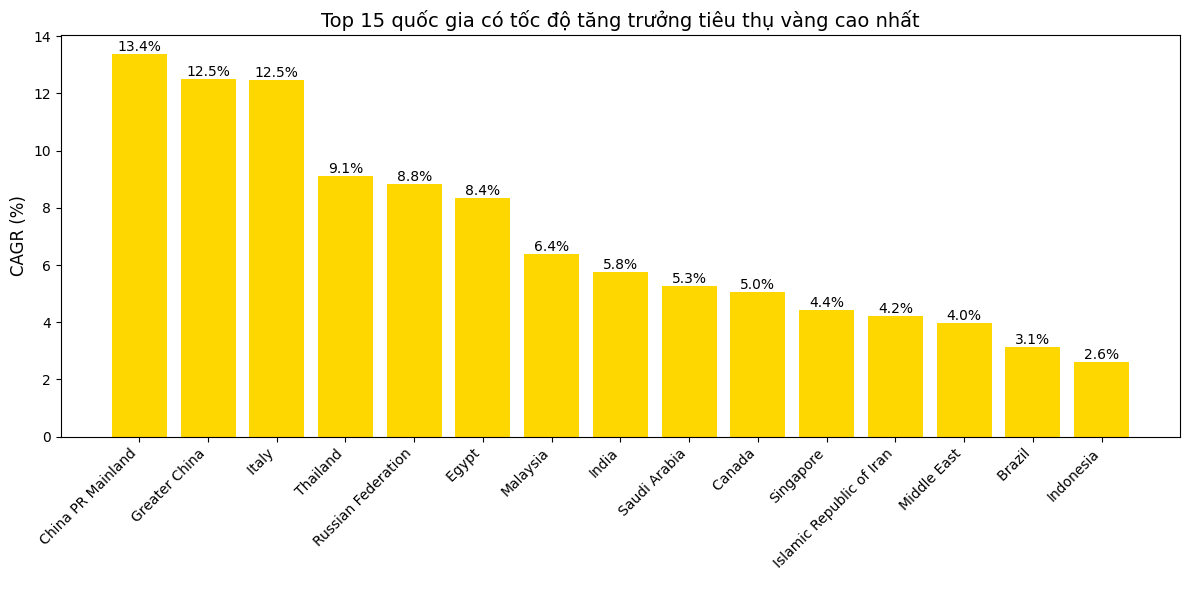

In [119]:
import pandas as pd
import matplotlib.pyplot as plt

# Giả sử df_long đã có các cột: ['country', 'year', 'value']
# Tính giá trị đầu và cuối cho mỗi quốc gia
df_start = df_long.groupby('country')['value'].first()
df_end = df_long.groupby('country')['value'].last()

# Số năm giữa 2 mốc (n)
n_years = df_long['year'].max() - df_long['year'].min()

# Tính CAGR
cagr = ((df_end / df_start) ** (1 / n_years) - 1) * 100
cagr = cagr.sort_values(ascending=False).head(15)

# Vẽ biểu đồ Top 15 CAGR
plt.figure(figsize=(12,6))
bars = plt.bar(cagr.index, cagr.values, color='gold')
plt.xticks(rotation=45, ha='right')
plt.ylabel('CAGR (%)', fontsize=12)
plt.title('Top 15 quốc gia có tốc độ tăng trưởng tiêu thụ vàng cao nhất', fontsize=14)

# Thêm giá trị trên cột
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f"{yval:.1f}%",
             ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


1. Trung Quốc dẫn đầu và vượt trội
China PR Mainland (13.4%) và Greater China (12.5%) đều nằm ở top đầu.

- Điều này cho thấy thị trường vàng ở Trung Quốc không chỉ lớn về quy mô mà còn tăng trưởng nhanh, phản ánh nhu cầu mạnh mẽ đến từ cả tiêu dùng (trang sức, quà tặng) và đầu tư (vàng vật chất).

- Chính sách khuyến khích dự trữ vàng cá nhân, xu hướng coi vàng là tài sản an toàn và thu nhập người dân tăng là yếu tố thúc đẩy.

2. Sự trỗi dậy của châu Âu và Đông Nam Á
Italy (12.5%) là bất ngờ, cho thấy nhu cầu vàng trang sức và đầu tư ở châu Âu không chỉ duy trì mà còn tăng mạnh, có thể liên quan tới bất ổn kinh tế, lạm phát và thị hiếu tiêu dùng cao cấp.

- Thailand (9.1%), Malaysia (6.4%), Singapore (4.4%) cho thấy Đông Nam Á đang nổi lên như một khu vực tăng trưởng tiêu thụ vàng, nhờ vai trò trung tâm giao dịch, du lịch mua sắm và văn hóa chuộng vàng.

3. Nga và Trung Đông
Russia (8.8%) có mức tăng trưởng cao, một phần nhờ lệnh trừng phạt quốc tế thúc đẩy người dân nắm giữ vàng như tài sản an toàn.

- Saudi Arabia (5.3%), Iran (4.2%), Middle East (4.0%) vẫn duy trì nhu cầu ổn định, gắn liền với truyền thống tích trữ vàng và thu nhập từ dầu mỏ.

4. Ấn Độ tăng trưởng nhưng chưa bứt phá
Mặc dù Ấn Độ là thị trường tiêu thụ vàng lớn nhất thế giới, CAGR chỉ ở mức 5.8%.

- Điều này cho thấy quy mô thị trường đã bão hòa, tăng trưởng chậm hơn so với các thị trường mới nổi. Chính sách thuế nhập khẩu cao cũng ảnh hưởng phần nào.

5. Các thị trường tiềm năng mới
Brazil (3.1%) và Indonesia (2.6%) tăng trưởng chậm hơn, nhưng đây là quốc gia đông dân, nếu thu nhập tăng thì nhu cầu vàng có thể bứt phá trong tương lai.

💡 Insight chính:

- Trung Quốc là động lực tăng trưởng toàn cầu, chi phối xu hướng tiêu thụ vàng.

- Đông Nam Á đang trở thành khu vực tiêu thụ vàng quan trọng.

- Các quốc gia có mức tăng trưởng vừa phải nhưng dân số lớn (Ấn Độ, Indonesia, Brazil) vẫn là thị trường tiềm năng nếu chính sách nhập khẩu và thuế được điều chỉnh.

In [120]:
dfa = pd.read_csv('support/nhu_cau_tieu_dung_vang_20_25.csv')
dfa.tail()

,country,Q1_20,Q2_20,Q3_20,Q4_20,Q1_21,Q2_21,Q3_21,Q4_21,Q1_22,...,Q2_23,Q3_23,Q4_23,Q1_24,Q2_24,Q3_24,Q4_24,Q1_25,Q2_25,year_on_year_change
36,Austria,2.8,3.3,2.4,3.1,3.2,2.9,2.5,3.6,3.7,...,0.9,0.9,1.1,0.2,0.5,0.6,1.1,0.6,1.1,97
37,Other Europe,7.2,7.7,5.1,7.3,10.7,9.2,7.5,8.5,10.3,...,7.4,7.2,7.3,5.7,5.5,5.9,6.3,7.3,8.1,48
38,Total above,499.6,374.8,508,717.4,828.1,647.9,692.3,974.1,704.8,...,703.4,769.1,874.0,750.4,617.2,683.6,808.4,660.5,599.2,-3
39,Other & stock change,67.6,38.4,47.2,65.1,48.0,53.6,51.8,77,59.7,...,56.1,45.8,61.4,51.3,53.6,46.9,65.0,47.5,48.5,-10
40,World total,567.2,413.2,555.2,782.5,876.1,701.4,744.1,"1,051.00",764.5,...,759.5,814.9,935.4,801.6,670.8,730.6,873.4,708.0,647.7,-3


In [121]:
dfs = dfa.copy()
# xoá các giá trị thiếu:
dfs.dropna(inplace=True)

In [122]:
import pandas as pd
import io


# Đặt cột 'country' làm chỉ mục
dfs.set_index('country', inplace=True)

# Khởi tạo một Series rỗng để lưu kết quả
average_shares = pd.Series(dtype='float64')

# Lấy dữ liệu tổng thế giới và các cột theo quý
world_total_demand = dfs.loc['World total']
quarter_columns = [col for col in dfs.columns if col.startswith('Q')]

# Lấy danh sách các quốc gia/vùng cần tính toán (loại trừ các dòng tổng)
countries_to_analyze = dfs.index.drop(['World total', 'Total above', 'Other & stock change'])

print("Đang tính toán tỷ lệ phần trăm trung bình cho từng quốc gia/vùng...")
print("-" * 50)

# Lặp qua từng quốc gia và tính tỷ lệ trung bình
for country in countries_to_analyze:
    country_demand = dfs.loc[country]

    # Chuyển đổi dữ liệu sang kiểu số và xử lý lỗi
    country_demand_numeric = pd.to_numeric(country_demand[quarter_columns], errors='coerce')
    world_total_demand_numeric = pd.to_numeric(world_total_demand[quarter_columns], errors='coerce')

    # Tính toán tỷ lệ phần trăm theo từng quý
    country_share_quarterly = (country_demand_numeric / world_total_demand_numeric) * 100

    # Tính tỷ lệ trung bình và lưu vào Series
    average_share = country_share_quarterly.mean()
    average_shares[country] = average_share

# Sắp xếp kết quả từ cao xuống thấp
ranked_shares = average_shares.sort_values(ascending=False)

print("Tỷ lệ phần trăm nhu cầu vàng trung bình so với thế giới (sắp xếp từ cao xuống thấp):")
print(ranked_shares.round(2).to_string())

Đang tính toán tỷ lệ phần trăm trung bình cho từng quốc gia/vùng...
--------------------------------------------------
Tỷ lệ phần trăm nhu cầu vàng trung bình so với thế giới (sắp xếp từ cao xuống thấp):
Greater China                  28.56
   China PR Mainland           27.29
India                          21.77
Americas                        9.25
Middle East                     9.11
Europe ex CIS                   8.95
   United States                7.42
Turkey                          4.84
   Germany                      4.04
   Saudi Arabia                 2.34
   Islamic Republic of Iran     2.25
Russian Federation              1.94
Vietnam                         1.75
Indonesia                       1.51
   UAE                          1.48
   Egypt                        1.45
Pakistan                        1.28
   Switzerland                  1.27
Korea Republic of               1.15
   Other Europe                 1.07
   United Kingdom               1.03
   Other Middle Eas

đọc file

# chi phí khai thác vàng-tạo mức giá sàn

# yếu tố ảnh hưởng đến biến động giá

In [123]:
df_g = pd.read_csv('data/gold_5y_1d.csv')
df_g

,Date,Close,High,Low,Open,Volume
0,2020/07/29,1953.500000,1953.500000,1952.599976,1953.199951,209835.0
1,2020/07/30,1942.300049,1965.099976,1930.000000,1963.400024,28853.0
2,2020/07/31,1962.800049,1981.099976,1948.000000,1948.599976,2914.0
3,2020/08/03,1966.000000,1984.300049,1955.500000,1984.300049,683.0
4,2020/08/04,2001.199951,2016.199951,1968.800049,1971.000000,2010.0
...,...,...,...,...,...,...
1253,2025/07/23,3394.100098,3433.899902,3388.100098,3430.300049,63.0
1254,2025/07/24,3371.000000,3371.000000,3367.000000,3367.000000,1175.0
1255,2025/07/25,3334.000000,3345.000000,3326.500000,3344.000000,67.0
1256,NaN,NaN,NaN,NaN,NaN,NaN


In [124]:
df_g.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1256 non-null   object 
 1   Close   1256 non-null   float64
 2   High    1256 non-null   float64
 3   Low     1256 non-null   float64
 4   Open    1256 non-null   float64
 5   Volume  1256 non-null   float64
dtypes: float64(5), object(1)
memory usage: 59.1+ KB


In [125]:
df_g.isnull().sum()

Date      2
Close     2
High      2
Low       2
Open      2
Volume    2
dtype: int64

In [126]:
# xoá các giá trị null:
df_g.dropna(inplace=True)
df_g

,Date,Close,High,Low,Open,Volume
0,2020/07/29,1953.500000,1953.500000,1952.599976,1953.199951,209835.0
1,2020/07/30,1942.300049,1965.099976,1930.000000,1963.400024,28853.0
2,2020/07/31,1962.800049,1981.099976,1948.000000,1948.599976,2914.0
3,2020/08/03,1966.000000,1984.300049,1955.500000,1984.300049,683.0
4,2020/08/04,2001.199951,2016.199951,1968.800049,1971.000000,2010.0
...,...,...,...,...,...,...
1251,2025/07/21,3401.899902,3411.699951,3350.300049,3350.300049,53.0
1252,2025/07/22,3439.199951,3441.000000,3395.600098,3411.000000,39.0
1253,2025/07/23,3394.100098,3433.899902,3388.100098,3430.300049,63.0
1254,2025/07/24,3371.000000,3371.000000,3367.000000,3367.000000,1175.0


In [127]:
# chuẩn hoá cột Date:
df_g['Date'] = pd.to_datetime(df_g['Date'])
# df3['Date'] = pd.to_datetime(df3['Date'])  # đảm bảo cột Date đúng định dạng


In [128]:
dft = df_g.copy()

In [129]:
dft.set_index('Date', inplace=True)
# Tỷ lệ biến động theo giờ
dft['Change_%'] = dft['Close'].pct_change() * 100

# Độ biến động giá trong giờ đó
dft['Volatility'] = dft['High'] - dft['Low']
dft.head()


,Close,High,Low,Open,Volume,Change_%,Volatility
Date,,,,,,,
2020-07-29,1953.500000,1953.500000,1952.599976,1953.199951,209835.0,NaN,0.900024
2020-07-30,1942.300049,1965.099976,1930.000000,1963.400024,28853.0,-0.573327,35.099976
2020-07-31,1962.800049,1981.099976,1948.000000,1948.599976,2914.0,1.055450,33.099976
2020-08-03,1966.000000,1984.300049,1955.500000,1984.300049,683.0,0.163030,28.800049
2020-08-04,2001.199951,2016.199951,1968.800049,1971.000000,2010.0,1.790435,47.399902


# KÊNH ĐẦU TƯ VÀNG

# biến động giá qua các năm

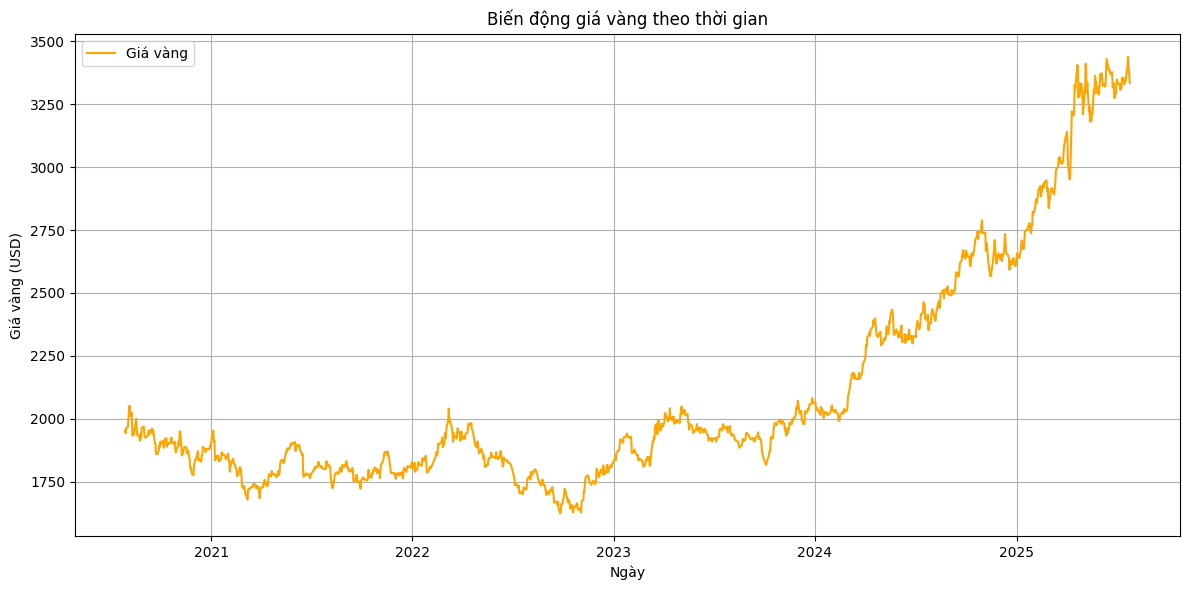

In [130]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(dft.index, dft["Close"], label="Giá vàng", color='orange')  # Dùng index làm trục x
plt.title("Biến động giá vàng theo thời gian")
plt.xlabel("Ngày")
plt.ylabel("Giá vàng (USD)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


# các chỉ báo kỹ thuật

# RSI - đo mức quá mua/ quá bán

In [131]:
df_rsi = df_g.copy()

           Date        Close        RSI
1251 2025-07-21  3401.899902  64.412048
1252 2025-07-22  3439.199951  68.080917
1253 2025-07-23  3394.100098  61.124979
1254 2025-07-24  3371.000000  56.351047
1255 2025-07-25  3334.000000  50.264869


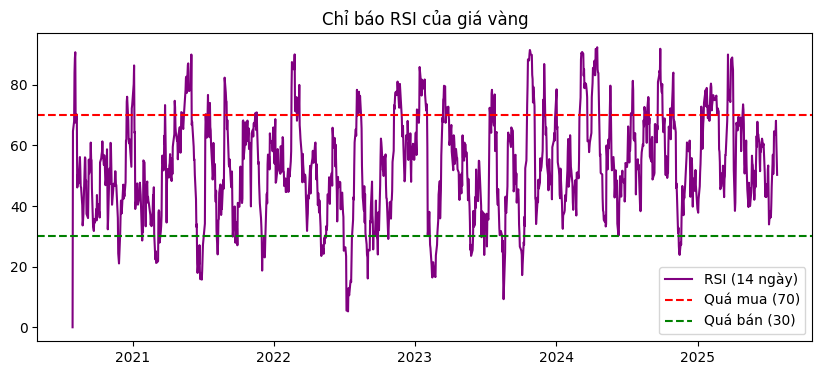

In [132]:

# Tính thay đổi giá hàng ngày
df_rsi['Change'] = df_rsi['Close'].diff()

# Tách phần tăng (gain) và giảm (loss)
df_rsi['Gain'] = np.where(df_rsi['Change'] > 0, df_rsi['Change'], 0)
df_rsi['Loss'] = np.where(df_rsi['Change'] < 0, -df_rsi['Change'], 0)

# Tính trung bình 14 ngày (RSI mặc định = 14)
window = 14
df_rsi['Avg_Gain'] = df_rsi['Gain'].rolling(window=window, min_periods=1).mean()
df_rsi['Avg_Loss'] = df_rsi['Loss'].rolling(window=window, min_periods=1).mean()

# Tính RS và RSI
df_rsi['RS'] = df_rsi['Avg_Gain'] / df_rsi['Avg_Loss']
df_rsi['RSI'] = 100 - (100 / (1 + df_rsi['RS']))

# Hiển thị kết quả
print(df_rsi[['Date', 'Close', 'RSI']].tail())

# Vẽ biểu đồ RSI
plt.figure(figsize=(10,4))
plt.plot(df_rsi['Date'], df_rsi['RSI'], label='RSI (14 ngày)', color='purple')
plt.axhline(70, color='red', linestyle='--', label='Quá mua (70)')
plt.axhline(30, color='green', linestyle='--', label='Quá bán (30)')
plt.title('Chỉ báo RSI của giá vàng')
plt.legend()
plt.show()


- RSI dao động liên tục trong vùng 20–80, thể hiện rằng:

-> Thị trường vàng có chu kỳ tăng–giảm thường xuyên, không theo một xu hướng tăng/giảm dài hạn ổn định.

-> Giá vàng biến động mạnh, đặc biệt trong các giai đoạn có RSI vượt 70 hoặc giảm dưới 30.

- Các đợt RSI vượt 70 (quá mua) thường trùng với:

-> Giai đoạn giá vàng đạt đỉnh ngắn hạn.

-> Sau đó có xu hướng điều chỉnh giảm.

- Các đợt RSI dưới 30 (quá bán) thường trùng với:

-> Thời điểm giá chạm đáy ngắn hạn.

-> Thị trường hồi phục sau đó.

=> Giá vàng cuối tháng 7/2025 đang rút khỏi vùng quá mua, RSI giảm dần → khả năng thị trường đang bước vào giai đoạn điều chỉnh giảm nhẹ hoặc tích lũy.

# MACD - chỉ báo kỹ thuật đo động lượng xu hướng giá dựa trên trung bình động hàm mũ (EMA) (thời điểm chuyển xu hướng giá)

In [133]:
df_macd = df_g.copy()
# Tính EMA
df_macd['EMA12'] = df_macd['Close'].ewm(span=12, adjust=False).mean()
df_macd['EMA26'] = df_macd['Close'].ewm(span=26, adjust=False).mean()

# Tính MACD và Signal
df_macd['MACD'] = df_macd['EMA12'] - df_macd['EMA26']
df_macd['Signal'] = df_macd['MACD'].ewm(span=9, adjust=False).mean()

# Tính Histogram
df_macd['Histogram'] = df_macd['MACD'] - df_macd['Signal']

# Hiển thị 5 dòng cuối
print(df_macd.tail())

           Date        Close         High          Low         Open  Volume  \
1251 2025-07-21  3401.899902  3411.699951  3350.300049  3350.300049    53.0   
1252 2025-07-22  3439.199951  3441.000000  3395.600098  3411.000000    39.0   
1253 2025-07-23  3394.100098  3433.899902  3388.100098  3430.300049    63.0   
1254 2025-07-24  3371.000000  3371.000000  3367.000000  3367.000000  1175.0   
1255 2025-07-25  3334.000000  3345.000000  3326.500000  3344.000000    67.0   

            EMA12        EMA26       MACD     Signal  Histogram  
1251  3348.793128  3339.221761   9.571367   5.014169   4.557198  
1252  3362.701870  3346.627553  16.074317   7.226198   8.848118  
1253  3367.532366  3350.144038  17.388329   9.258624   8.129704  
1254  3368.065848  3351.688924  16.376925  10.682284   5.694640  
1255  3362.824949  3350.378633  12.446315  11.035091   1.411225  


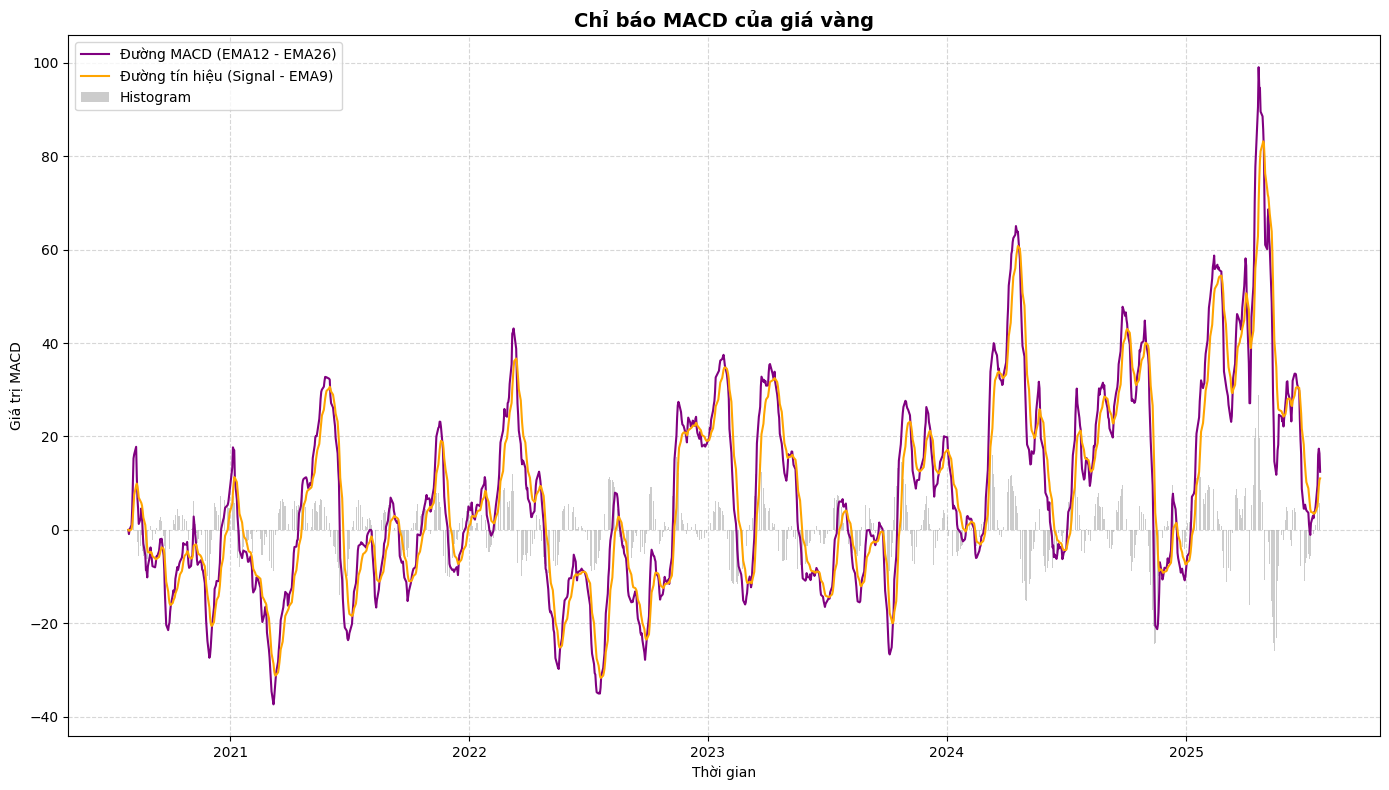

           Date        Close       MACD     Signal  Histogram
1251 2025-07-21  3401.899902   9.571367   5.014169   4.557198
1252 2025-07-22  3439.199951  16.074317   7.226198   8.848118
1253 2025-07-23  3394.100098  17.388329   9.258624   8.129704
1254 2025-07-24  3371.000000  16.376925  10.682284   5.694640
1255 2025-07-25  3334.000000  12.446315  11.035091   1.411225


In [134]:

# === 3. Vẽ biểu đồ MACD ===
plt.figure(figsize=(14, 8))

# Vẽ đường MACD và Signal
plt.plot(df_macd['Date'], df_macd['MACD'], label='Đường MACD (EMA12 - EMA26)', color='purple')
plt.plot(df_macd['Date'], df_macd['Signal'], label='Đường tín hiệu (Signal - EMA9)', color='orange')

# Vẽ cột Histogram
plt.bar(df_macd['Date'], df_macd['Histogram'], label='Histogram', color='gray', alpha=0.4)

# === 4. Trang trí biểu đồ ===
plt.title("Chỉ báo MACD của giá vàng", fontsize=14, fontweight='bold')
plt.xlabel("Thời gian")
plt.ylabel("Giá trị MACD")
plt.legend(loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

# === 5. Hiển thị kết quả ===
plt.show()

# Hiển thị vài dòng dữ liệu cuối
print(df_macd[['Date', 'Close', 'MACD', 'Signal', 'Histogram']].tail())

- Giai đoạn 2020–2021
- - MACD dao động quanh mức 0, liên tục cắt lên – xuống Signal.
- - Histogram nhỏ → động lượng yếu, giá vàng chủ yếu dao động trong biên độ hẹp.
- - Không có xu hướng rõ ràng → thị trường vàng đi ngang (sideways).
- 📌 Kết luận: Thị trường thiếu động lực tăng/giảm mạnh, không nên giao dịch theo xu hướng.

- Giai đoạn 2022–2023
- - MACD thường xuyên vượt mức 0, nhiều lần tạo đỉnh lớn.
- - Histogram dương mở rộng → động lượng tăng mạnh.
- - Một số thời điểm MACD giảm sâu dưới 0 → điều chỉnh ngắn hạn.
- 📌 Kết luận:
- - Giá vàng trong giai đoạn này có nhiều nhịp tăng – giảm rõ rệt, phù hợp cho giao dịch ngắn hạn (trading theo xu hướng).

- Giai đoạn 2024 – đầu 2025
- - MACD có đỉnh rất cao vào giữa 2024, histogram dương mạnh → đà tăng giá vàng mạnh mẽ, có thể trùng với các giai đoạn bất ổn kinh tế hoặc tăng nhu cầu trú ẩn.
- - Sau đó MACD giảm mạnh, histogram chuyển âm → thị trường điều chỉnh giảm rõ rệt.
- - Cuối 2025, MACD lại cắt lên Signal nhẹ → có tín hiệu hồi phục yếu.
- 📌 Kết luận:
- - Giai đoạn 2024 là đỉnh sóng tăng.
- - Đầu 2025 là pha điều chỉnh giảm.
- - Cuối 2025 có tín hiệu hồi phục ban đầu (MACD đang cắt lên Signal).


| Tín hiệu                            | Diễn giải                                 | Hành động đầu tư                 |
| ----------------------------------- | ----------------------------------------- | -------------------------------- |
| MACD cắt **lên** Signal từ dưới 0   | Tín hiệu **mua sớm**, giá có thể hồi phục | Xem xét **mua vào**              |
| MACD cắt **xuống** Signal từ trên 0 | Tín hiệu **bán**, đà tăng kết thúc        | **Chốt lời** hoặc **bán khống**  |
| Histogram **> 0** và mở rộng        | Đà tăng mạnh                              | Giữ vị thế mua                   |
| Histogram **< 0** và mở rộng        | Đà giảm mạnh                              | Giữ vị thế bán hoặc chờ hồi phục |


- MACD đang ở dưới mức đỉnh, nhưng đã có dấu hiệu bật lên nhẹ.

- Histogram xám đang chuyển từ âm sang dương.

- 👉 => Dấu hiệu sớm cho thấy thị trường vàng có thể đang phục hồi sau giai đoạn giảm mạnh.

- 🟢 Dự báo: giá vàng cuối 2025 có khả năng bước vào chu kỳ tăng mới ngắn hạn.

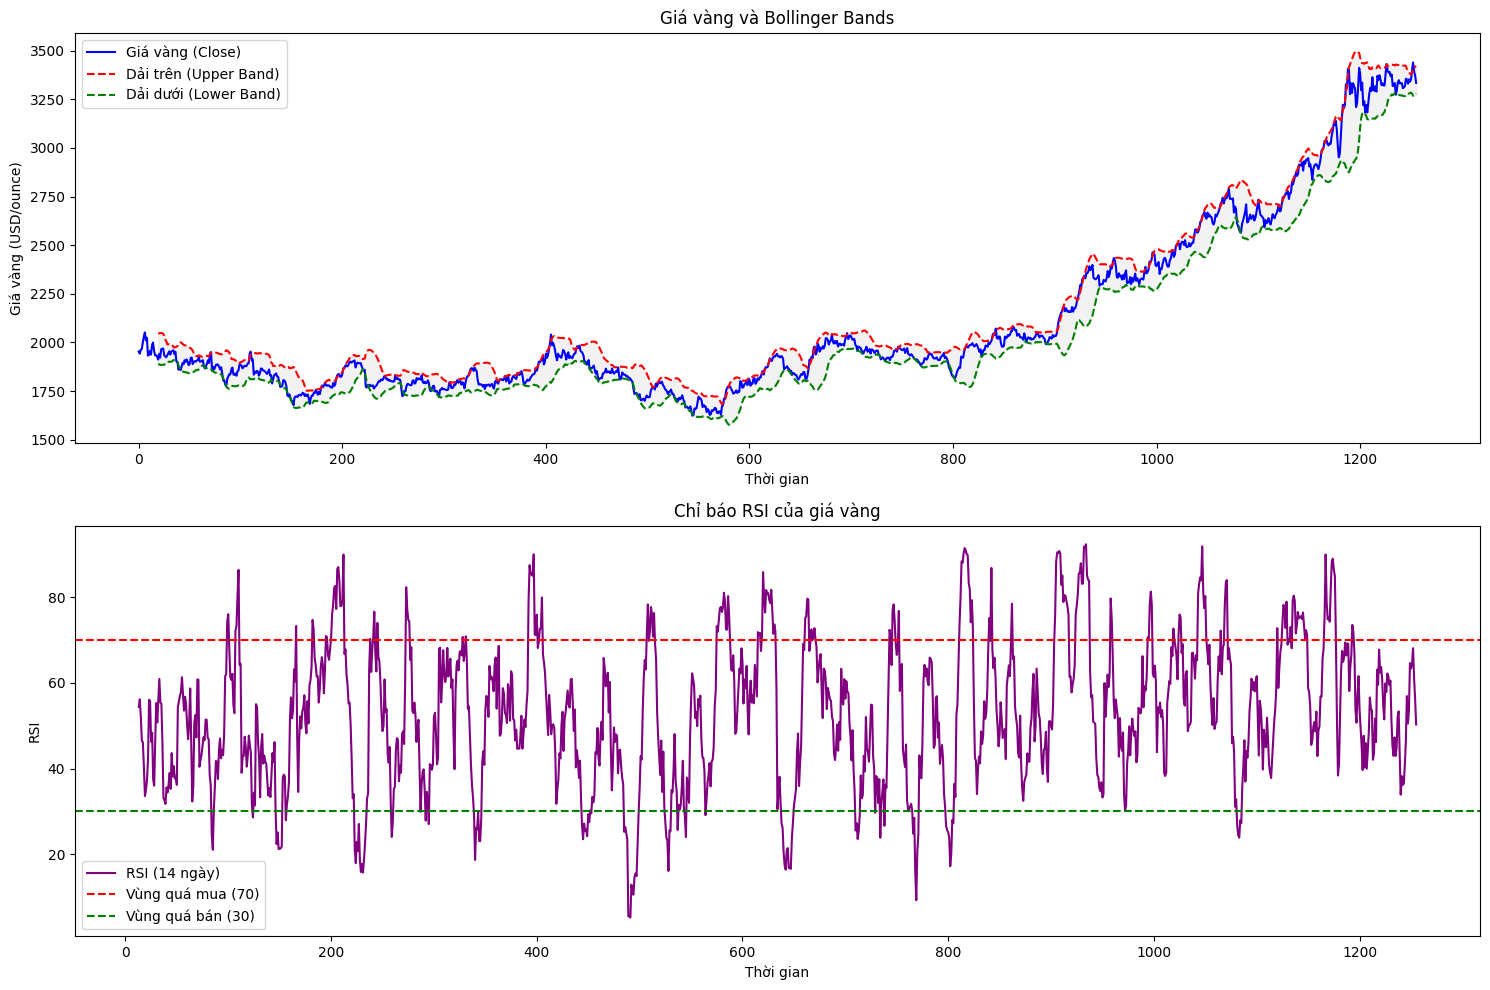

In [135]:
df_bd = df_g.copy()
# 🔹 Tính Bollinger Bands
period = 20
df_bd['SMA'] = df_bd['Close'].rolling(window=period).mean()
df_bd['STD'] = df_bd['Close'].rolling(window=period).std()
df_bd['Upper Band'] = df_bd['SMA'] + (2 * df_bd['STD'])
df_bd['Lower Band'] = df_bd['SMA'] - (2 * df_bd['STD'])

# 🔹 Tính RSI (Relative Strength Index)
window_length = 14
delta = df_bd['Close'].diff()

gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)

avg_gain = gain.rolling(window=window_length).mean()
avg_loss = loss.rolling(window=window_length).mean()

rs = avg_gain / avg_loss
df_bd['RSI'] = 100 - (100 / (1 + rs))

# 🔹 Vẽ biểu đồ
plt.figure(figsize=(15,10))

# --- Biểu đồ 1: Giá vàng + Bollinger Bands
plt.subplot(2,1,1)
plt.plot(df_bd.index, df_bd['Close'], label='Giá vàng (Close)', color='blue')
plt.plot(df_bd.index, df_bd['Upper Band'], label='Dải trên (Upper Band)', color='red', linestyle='--')
plt.plot(df_bd.index, df_bd['Lower Band'], label='Dải dưới (Lower Band)', color='green', linestyle='--')
plt.fill_between(df_bd.index, df_bd['Lower Band'], df_bd['Upper Band'], color='gray', alpha=0.1)
plt.title('Giá vàng và Bollinger Bands')
plt.xlabel('Thời gian')
plt.ylabel('Giá vàng (USD/ounce)')
plt.legend()

# --- Biểu đồ 2: RSI
plt.subplot(2,1,2)
plt.plot(df_bd.index, df_bd['RSI'], label='RSI (14 ngày)', color='purple')
plt.axhline(70, color='red', linestyle='--', label='Vùng quá mua (70)')
plt.axhline(30, color='green', linestyle='--', label='Vùng quá bán (30)')
plt.title('Chỉ báo RSI của giá vàng')
plt.xlabel('Thời gian')
plt.ylabel('RSI')
plt.legend()

plt.tight_layout()
plt.show()


=> ✅ Mua khi RSI < 30 và giá chạm dải dưới.

- ⚠️ Bán khi RSI > 70 và giá chạm dải trên.

# biểu đồ thể hiện giá và khối lượng giao dịch của loại vàng

#khối lượng giao dịch trên từng quý

In [136]:
# tạo cột theo quý
df_g["year"] = df_g["Date"].dt.year
df_g["quarter_number"] = df_g["Date"].dt.quarter


In [137]:
df_g["quarter"] = df_g["year"].astype(str) + "-Q" + df_g["quarter_number"].astype(str)


In [138]:
df_g

,Date,Close,High,Low,Open,Volume,year,quarter_number,quarter
0,2020-07-29,1953.500000,1953.500000,1952.599976,1953.199951,209835.0,2020,3,2020-Q3
1,2020-07-30,1942.300049,1965.099976,1930.000000,1963.400024,28853.0,2020,3,2020-Q3
2,2020-07-31,1962.800049,1981.099976,1948.000000,1948.599976,2914.0,2020,3,2020-Q3
3,2020-08-03,1966.000000,1984.300049,1955.500000,1984.300049,683.0,2020,3,2020-Q3
4,2020-08-04,2001.199951,2016.199951,1968.800049,1971.000000,2010.0,2020,3,2020-Q3
...,...,...,...,...,...,...,...,...,...
1251,2025-07-21,3401.899902,3411.699951,3350.300049,3350.300049,53.0,2025,3,2025-Q3
1252,2025-07-22,3439.199951,3441.000000,3395.600098,3411.000000,39.0,2025,3,2025-Q3
1253,2025-07-23,3394.100098,3433.899902,3388.100098,3430.300049,63.0,2025,3,2025-Q3
1254,2025-07-24,3371.000000,3371.000000,3367.000000,3367.000000,1175.0,2025,3,2025-Q3


In [139]:
# tính khối lượng giao dịch theo quý:
giaodich_quy = df_g.groupby('quarter')['Volume'].sum().reset_index()
giaodich_quy

,quarter,Volume
0,2020-Q3,271093.0
1,2020-Q4,310344.0
2,2021-Q1,410657.0
3,2021-Q2,229245.0
4,2021-Q3,292114.0
5,2021-Q4,240759.0
6,2022-Q1,398521.0
7,2022-Q2,178428.0
8,2022-Q3,247736.0
9,2022-Q4,179977.0


# biến động giá trên từng quý

In [140]:
# tính giá trung bình của từng quý
avg_price_by_quarter = (
    df_g.groupby("quarter")["Close"]
    .mean()
    .reset_index()
    .rename(columns={"Close": "avg_close_price"})
)
avg_price_by_quarter


,quarter,avg_close_price
0,2020-Q3,1943.897773
1,2020-Q4,1875.492182
2,2021-Q1,1791.680332
3,2021-Q2,1814.579371
4,2021-Q3,1788.821869
5,2021-Q4,1795.578114
6,2022-Q1,1878.958055
7,2022-Q2,1870.464519
8,2022-Q3,1724.748438
9,2022-Q4,1729.666671


# kết quả biến động giá trên từng quý

In [141]:
# merge 2 data của giá trên từng quý và data tổng khối lượng giao dịch trên từng quý:
df_quarterly = pd.merge(giaodich_quy, avg_price_by_quarter, on="quarter")
df_quarterly

,quarter,Volume,avg_close_price
0,2020-Q3,271093.0,1943.897773
1,2020-Q4,310344.0,1875.492182
2,2021-Q1,410657.0,1791.680332
3,2021-Q2,229245.0,1814.579371
4,2021-Q3,292114.0,1788.821869
5,2021-Q4,240759.0,1795.578114
6,2022-Q1,398521.0,1878.958055
7,2022-Q2,178428.0,1870.464519
8,2022-Q3,247736.0,1724.748438
9,2022-Q4,179977.0,1729.666671


In [142]:
import plotly.graph_objects as go

fig = go.Figure()

# Biểu đồ cột: Khối lượng giao dịch
fig.add_trace(
    go.Bar(
        x=df_quarterly["quarter"],
        y=df_quarterly["Volume"],
        name="Khối lượng giao dịch",
        marker_color='steelblue',
        yaxis='y1'
    )
)

# Biểu đồ đường: Giá vàng trung bình
fig.add_trace(
    go.Scatter(
        x=df_quarterly["quarter"],
        y=df_quarterly["avg_close_price"],
        name="Giá vàng trung bình",
        mode="lines+markers",
        line=dict(color="gold", width=3),
        marker=dict(symbol="circle", size=8),
        yaxis='y2'
    )
)

# Cấu hình trục và layout
fig.update_layout(
    title="Khối lượng giao dịch và giá vàng trung bình theo từng quý (2020-Q3 → 2025-Q2)",
    xaxis=dict(title="Quý", tickangle=45),
    yaxis=dict(
        title="Khối lượng giao dịch",
        titlefont=dict(color="steelblue"),
        tickfont=dict(color="steelblue")
    ),
    yaxis2=dict(
        title="Giá vàng trung bình",
        titlefont=dict(color="gold"),
        tickfont=dict(color="gold"),
        anchor="x",
        overlaying="y",
        side="right"
    ),
    legend=dict(x=0.01, y=0.99),
    bargap=0.2,
    height=500,
    template="plotly_white"
)

fig.show()


diễn biến giá vàng
- 2020-Q3 → 2022-Q4: Giá vàng dao động nhẹ, không có xu hướng tăng/giảm rõ rệt. Có những giai đoạn giảm như 2020-Q3 → 2021-Q1, và tăng nhẹ sau đó.

- Từ 2023-Q1 trở đi: Bắt đầu xuất hiện xu hướng tăng rõ rệt, đặc biệt từ 2024-Q1 đến 2025-Q2: giá vàng tăng mạnh liên tục mỗi quý.
- => Thị trường có thể đang thiếu thanh khoản khi giá cao, hoặc nhà đầu tư đang có tâm lý giữ vàng không giao dịch, hoặc thị trường đang trong trạng thái đầu cơ mạnh.

biểu đồ cho thấy:
- giá giảm thì mọi người có xu hướng mua vàng để cất trữ hoặc đầu cơ đợi cơ hội giá vàng tăng ở các quý tiếp theo và ngược lại khi giá cao thì khối lượng giao dịch giảm đi, các nhà đầu tư lo sợ rủi ro đu đỉnh(mua cao bán thấp)
- => giá vàng và khối lượng giao dịch tỷ lệ nghịch với nhau


- cho thấy thị trường vàng có thể bị ảnh hưởng bởi nhiều yếu tố ngoài cung cầu, ví dụ như:

- Chính sách lãi suất của FED.

- Tâm lý phòng ngừa rủi ro vĩ mô (lạm phát, khủng hoảng).

- Sự dịch chuyển dòng tiền giữa các tài sản (vàng ↔ crypto ↔ chứng khoán).



# ảnh hưởng của lãi suất fed đến giá vàng:

In [143]:
df_fed_cpi_gold = pd.read_csv('data/df_fed_cpi_gold.csv')
df_fed_cpi_gold.tail()

,observation_date_x,FEDFUNDS,year_x,quarter_number_x,quarter,avg_close_price,CPIAUCSL,REAINTRATREARAT10Y
16,2024-07-01,5.26,2024,3,2024-Q3,2474.848431,314.183,1.764722
17,2024-10-01,4.65,2024,4,2024-Q4,2661.817192,316.539,1.754311
18,2025-01-01,4.33,2025,1,2025-Q1,2867.896729,319.492,1.980799
19,2025-04-01,4.33,2025,2,2025-Q2,3279.814508,320.800,1.735290
20,2025-07-01,4.33,2025,3,2025-Q3,3349.478953,320.800,1.670490


In [144]:
# vẽ biểu đồ giữa lãi suất và giá vàng theo quý:
import plotly.graph_objects as go

fig = go.Figure()

# Biểu đồ cột: lãi suất
fig.add_trace(
    go.Bar(
        x=df_fed_cpi_gold["quarter"],
        y=df_fed_cpi_gold["FEDFUNDS"],
        name="lãi suất",
        marker_color='steelblue',
        yaxis='y1'
    )
)

# Biểu đồ đường: Giá vàng trung bình
fig.add_trace(
    go.Scatter(
        x=df_fed_cpi_gold["quarter"],
        y=df_fed_cpi_gold["avg_close_price"],
        name="Giá vàng trung bình",
        mode="lines+markers",
        line=dict(color="gold", width=3),
        marker=dict(symbol="circle", size=8),
        yaxis='y2'
    )
)

# Cấu hình trục và layout
fig.update_layout(
    title="lãi suất và giá vàng trung bình theo từng quý (2020-Q3 → 2025-Q2)",
    xaxis=dict(title="Quý", tickangle=45),
    yaxis=dict(
        title="lãi suất",
        titlefont=dict(color="steelblue"),
        tickfont=dict(color="steelblue")
    ),
    yaxis2=dict(
        title="Giá vàng trung bình",
        titlefont=dict(color="gold"),
        tickfont=dict(color="gold"),
        anchor="x",
        overlaying="y",
        side="right"
    ),
    legend=dict(x=0.01, y=0.99),
    bargap=0.2,
    height=500,
    template="plotly_white"
)

fig.show()


In [145]:
import plotly.graph_objects as go

fig = go.Figure()

# --- Cột: Lãi suất điều hành ---
fig.add_trace(
    go.Bar(
        x=df_fed_cpi_gold["quarter"],
        y=df_fed_cpi_gold["FEDFUNDS"],
        name="Lãi suất điều hành (FED Funds)",
        marker_color="steelblue",
        yaxis="y1"
    )
)

# --- Đường: Giá vàng ---
fig.add_trace(
    go.Scatter(
        x=df_fed_cpi_gold["quarter"],
        y=df_fed_cpi_gold["avg_close_price"],
        name="Giá vàng trung bình",
        mode="lines+markers",
        line=dict(width=3, color="gold"),
        yaxis="y2"
    )
)

# --- Đường: Lãi suất thực ---
fig.add_trace(
    go.Scatter(
        x=df_fed_cpi_gold["quarter"],
        y=df_fed_cpi_gold["REAINTRATREARAT10Y"],
        name="Lãi suất thực (Real Rate)",
        mode="lines+markers",
        line=dict(width=3, color="green"),
        yaxis="y1"
    )
)

# --- Layout ---
fig.update_layout(
    title="Giá vàng, Lãi suất thực và Lãi suất điều hành theo quý (2020–2025)",
    xaxis=dict(title="Quý", tickangle=45),

    yaxis=dict(
        title="Lãi suất (%)",
        titlefont=dict(color="steelblue"),
        tickfont=dict(color="steelblue")
    ),

    yaxis2=dict(
        title="Giá vàng (USD/oz)",
        titlefont=dict(color="gold"),
        tickfont=dict(color="gold"),
        overlaying="y",
        side="right"
    ),

    bargap=0.2,
    height=550,
    template="plotly_white",
    legend=dict(x=0.02, y=0.98)
)

fig.show()


giá vàng cuối 2020-2021 ko có biến động lớn, đúng theo quy luật lãi suất giảm vàng tăng
- cuối 2022 đầu 2023, lãi suất và vàng cùng tăng => vì chiến tranh giữa Nga-Ukraina
- đầu 2023 đến đầu 2024, vàng vẫn ko hạ nhiệt => vì xung đột khu vực Trung Đông giữa Israel và Iran
- 21/6/2025, có thông tin Mỹ ném bom vào 3 cơ sở hạt nhân của Iran


- quan xác kết quả: cuối 2020 giá vàng và lãi suất ko có biến động lớn
- 2021 giá vàng và lãi suất biến động nhẹ, giá vàng tăng lãi suất giảm;
- 2 quý cuối năm 2022 đầu 2023 lãi tăng vàng cũng tăng nguyên nhân xảy ra chiến tranh giữa Nga và Ukraina khiến cho giá vàng tăng trong nửa đầu năm 2023
- 2 quý đầu 2023 đến 2 quý đầu 2024 giá vàng và lãi suất cùng tăng => nguyên nhân do tác động của tình hình chính trị, xung đột khu vực Trung Đông giữa Israel và Iran
- => tình hình chính trị thế giới ảnh hưởng lớn đến giá vàng


- lãi suất và giá vàng tỉ lệ nghịch vs nhau


 - Tín hiệu nền kinh tế rủi ro hoặc lạm phát kéo dài → Vàng tăng mạnh
 -  khi lãi suất duy trì cao quá lâu, nhà đầu tư chuyển sang vàng để bảo toàn giá trị, bất chấp chi phí cơ hội cao.

- Không chỉ giá trị hiện tại của lãi suất, mà kỳ vọng về lãi suất tương lai mới là yếu tố ảnh hưởng chính đến giá vàng.

- Khi Fed giữ lãi suất cao kéo dài, thị trường bắt đầu dự đoán Fed sẽ nới lỏng chính sách tiền tệ, từ đó giá vàng tăng mạnh trước khi chính sách thực sự thay đổi.

- Tăng trưởng giá vàng mạnh mẽ trong 2024–2025 có thể phản ánh tâm lý lo ngại về suy thoái, địa chính trị, hoặc mất niềm tin vào USD.

# mối quan hệ giữa lãi suất, lạm phát và giá vàng

# biểu đồ thể hiện mối quan hệ giữa giá vàng lãi suất, lạm phát

In [ ]:
# vẽ biểu đồ giữa lãi suất và giá vàng theo quý:
import plotly.graph_objects as go

fig = go.Figure()
# Biểu đồ cột: lãi suất
fig.add_trace(
    go.Bar(
        x=df_fed_cpi_gold["quarter"],
        y=df_fed_cpi_gold["FEDFUNDS"],
        name="lãi suất",
        marker_color='steelblue',
        yaxis='y1'
    )
)

# Biểu đồ đường: Giá vàng trung bình
fig.add_trace(
    go.Scatter(
        x=df_fed_cpi_gold["quarter"],
        y=df_fed_cpi_gold["CPIAUCSL"],
        name=" lạm phát",
        mode="lines+markers",
        line=dict(color="gold", width=3),
        marker=dict(symbol="circle", size=8),
        yaxis='y2'
    )
)

# Cấu hình trục và layout
fig.update_layout(
    title="lãi suất và lạm phát theo từng quý (2020-Q3 → 2025-Q2)",
    xaxis=dict(title="Quý", tickangle=45),
    yaxis=dict(
        title="lãi suất",
        titlefont=dict(color="steelblue"),
        tickfont=dict(color="steelblue")
    ),
    yaxis2=dict(
        title="lạm phát",
        titlefont=dict(color="gold"),
        tickfont=dict(color="gold"),
        anchor="x",
        overlaying="y",
        side="right"
    ),
    legend=dict(x=0.01, y=0.99),
    bargap=0.2,
    height=500,
    template="plotly_white"
)

fig.show()
# 


- lạm phát tăng dẫn đến tiền bị mất giá nên nhà đầu tư sẽ lựa chọn đến những tài sản ổn định như vàng

- vào từ q3-2020 đến q1-2022 lãi suất ở mức thấp, lạm phát tăng dần, điều đó dẫn đến nền kinh tế sẽ bị suy thoái, vì thế FED đã tăng lãi suất nhằm kìm hãm lạm phát
- giai đoạn 2023-2025 khi lãi suất tăng cao thì tốc độ tăng của lạm phát cũng chậm lại
- => chứng tỏ chính sách thắt chặt đang dần có hiệu quả

- Lãi suất là công cụ quan trọng để kiểm soát lạm phát, nhưng tác động không tức thời.

- Giai đoạn lạm phát cao(kinh kế đang suy thoái) là thời điểm nhạy cảm để đầu tư, theo tâm lý nhà đầu tư sẽ lựa chọn nơi trú ẩn là vàng.

- Chiến lược đầu tư cần tính đến chu kỳ kinh tế – khi lạm phát tăng và lãi suất cao, nên ưu tiên tài sản an toàn như vàng; khi lạm phát hạ nhiệt, có thể chuyển sang cổ phiếu, crypto.



In [147]:
import plotly.graph_objects as go

fig = go.Figure()

# --- Cột: Lãi suất điều hành ---
fig.add_trace(
    go.Bar(
        x=df_fed_cpi_gold["quarter"],
        y=df_fed_cpi_gold["FEDFUNDS"],
        name="Lãi suất điều hành (FED Funds)",
        marker_color="steelblue",
        yaxis="y1"
    )
)

# --- Đường:  lạm phát ---
fig.add_trace(
    go.Scatter(
        x=df_fed_cpi_gold["quarter"],
        y=df_fed_cpi_gold["CPIAUCSL"],
        name="Lạm phát",
        mode="lines+markers",
        line=dict(width=3, color="gold"),
        yaxis="y2"
    )
)

# --- Đường: Lãi suất thực ---
fig.add_trace(
    go.Scatter(
        x=df_fed_cpi_gold["quarter"],
        y=df_fed_cpi_gold["REAINTRATREARAT10Y"],
        name="Lãi suất thực (Real Rate)",
        mode="lines+markers",
        line=dict(width=3, color="green"),
        yaxis="y1"
    )
)

# --- Layout ---
fig.update_layout(
    title="Lạm phát, Lãi suất thực và Lãi suất điều hành theo quý (2020–2025)",
    xaxis=dict(title="Quý", tickangle=45),

    yaxis=dict(
        title="Lãi suất (%)",
        titlefont=dict(color="steelblue"),
        tickfont=dict(color="steelblue")
    ),

    yaxis2=dict(
        title="Giá vàng (USD/oz)",
        titlefont=dict(color="gold"),
        tickfont=dict(color="gold"),
        overlaying="y",
        side="right"
    ),

    bargap=0.2,
    height=550,
    template="plotly_white",
    legend=dict(x=0.02, y=0.98)
)

fig.show()


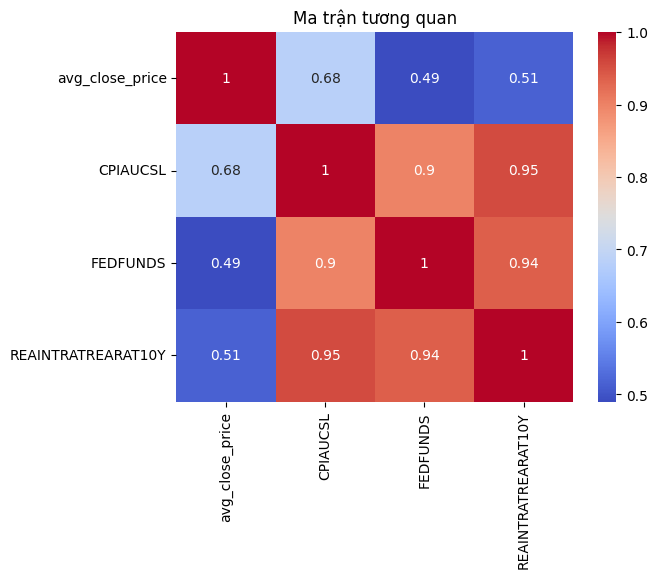

In [148]:
import seaborn as sns
import matplotlib.pyplot as plt

# Giả sử df đã có các cột: 'Gold_Price', 'CPI', 'FEDFUNDS', 'DXY', 'BTC'
corr_matrix = df_fed_cpi_gold[['avg_close_price', 'CPIAUCSL', 'FEDFUNDS','REAINTRATREARAT10Y']].corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Ma trận tương quan")
plt.show()


- các yếu tố lãi suất và lạm phát ảnh hưởng tương đối lớn đến biến động giá vàng
- đặc biệt chỉ số lãi suất tác động đến lạm phát
- tuy nhiên còn các yếu tố bên ngoài cũng tác động đến giá vàng như tình hình kinh tế toàn cầu, xung đột giữa nhiều quốc gia

# Xu hướng, chu kỳ, mùa vụ của giá vàng

In [149]:
dfb = df_g.copy()
dfb.head(20)

,Date,Close,High,Low,Open,Volume,year,quarter_number,quarter
0,2020-07-29,1953.500000,1953.500000,1952.599976,1953.199951,209835.0,2020,3,2020-Q3
1,2020-07-30,1942.300049,1965.099976,1930.000000,1963.400024,28853.0,2020,3,2020-Q3
2,2020-07-31,1962.800049,1981.099976,1948.000000,1948.599976,2914.0,2020,3,2020-Q3
3,2020-08-03,1966.000000,1984.300049,1955.500000,1984.300049,683.0,2020,3,2020-Q3
4,2020-08-04,2001.199951,2016.199951,1968.800049,1971.000000,2010.0,2020,3,2020-Q3
5,2020-08-05,2031.099976,2050.199951,2011.000000,2024.000000,1422.0,2020,3,2020-Q3
6,2020-08-06,2051.500000,2063.000000,2040.000000,2045.500000,294.0,2020,3,2020-Q3
7,2020-08-07,2010.099976,2055.000000,2009.599976,2040.099976,808.0,2020,3,2020-Q3
8,2020-08-10,2024.400024,2043.800049,2017.500000,2026.400024,233.0,2020,3,2020-Q3
9,2020-08-11,1932.599976,2016.000000,1904.000000,2012.400024,971.0,2020,3,2020-Q3


In [150]:
# ! pip install prophet

# xu hướng, mùa vụ

In [151]:
# 1. Đảm bảo cột Date là datetime và đặt làm index
dfb['Date'] = pd.to_datetime(dfb['Date'])
dfb.set_index('Date', inplace=True)

# 2. Loại bỏ thứ 7 (5) và Chủ nhật (6)
df_trading_days = dfb[dfb.index.dayofweek < 5]

# 3. Lấy giá vàng vào mỗi thứ Sáu (cuối tuần giao dịch)
weekly_gold = df_trading_days['Close'].resample('W-FRI').last()

# 4. Chuẩn bị dữ liệu cho Prophet
weekly_gold = weekly_gold.reset_index()
weekly_gold.columns = ['ds', 'y']

# 5. Cài và import Prophet (nếu chưa cài)
# !pip install prophet
from prophet import Prophet

# 6. Khởi tạo và huấn luyện mô hình Prophet
model = Prophet(weekly_seasonality=True, yearly_seasonality=True)
model.fit(weekly_gold)

# 7. Tạo khung dữ liệu cho 52 tuần tiếp theo
future = model.make_future_dataframe(periods=52, freq='W-FRI')

# 8. Dự đoán tương lai
forecast = model.predict(future)


13:51:42 - cmdstanpy - INFO - Chain [1] start processing
13:51:42 - cmdstanpy - INFO - Chain [1] done processing


In [152]:
import plotly.graph_objects as go

# Trích xuất trend và yearly seasonality từ kết quả dự báo
trend = forecast[['ds', 'trend']]
seasonal = forecast[['ds', 'yearly']]

# Vẽ bằng plotly
fig = go.Figure()

# Đường xu hướng (trend)
fig.add_trace(go.Scatter(
    x=trend['ds'],
    y=trend['trend'],
    mode='lines',
    name='Trend',
    line=dict(color='blue')
))

# Chu kỳ theo năm (yearly seasonality)
fig.add_trace(go.Scatter(
    x=seasonal['ds'],
    y=seasonal['yearly'],
    mode='lines',
    name='Yearly Seasonality',
    line=dict(color='green')
))

# Tùy chỉnh bố cục
fig.update_layout(
    title='Xu hướng và Chu kỳ năm của Giá Vàng (dự báo bằng Prophet)',
    xaxis_title='Thời gian',
    yaxis_title='Giá vàng (USD/oz)',
    legend_title='Thành phần',
    template='plotly_white',
    width=1000,
    height=600,
    title_font=dict(size=25)
)

fig.show()


/opt/anaconda3/lib/python3.11/site-packages/_plotly_utils/basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



1. Xu hướng dài hạn (Trend – Đường màu xanh dương):
Từ 2020 đến khoảng cuối 2023: Giá vàng gần như ổn định và dao động nhẹ quanh mức 1750–1900 USD/oz.

- Từ 2024 trở đi: Bắt đầu tăng mạnh rõ rệt, đặc biệt từ cuối 2024 đến 2026 — giá có xu hướng leo thẳng đứng, vượt mốc 3000 USD/oz.

Kết luận:
- dự đoán một chu kỳ tăng trưởng mạnh mẽ của giá vàng trong tương lai, bắt đầu từ 2024 và đạt đỉnh trong 2026. Điều này có thể phản ánh kỳ vọng về:

- Rủi ro lạm phát dài hạn

- Môi trường lãi suất giảm trở lại

- Nhu cầu trú ẩn tăng (khủng hoảng/tình hình địa chính trị)

kết quả cho thấy:
- xu hướng từ 2021 đến 2025 đang trên đà tăng trưởng
- Mức độ biến động theo mùa rất nhỏ, chỉ dao động quanh ±50 USD/oz.

- Một số tháng có mức tăng nhẹ, ví dụ đầu năm và giữa năm, nhưng ảnh hưởng không đáng kể.

Kết luận:
- Giá vàng không chịu ảnh hưởng mạnh từ chu kỳ mùa vụ, mà chủ yếu phụ thuộc vào các yếu tố kinh tế vĩ mô dài hạn như chính sách tiền tệ, lạm phát và khủng hoảng tài chính

In [153]:
from statsmodels.tsa.seasonal import seasonal_decompose


# Dự báo giá vàng trong nửa cuối năm 2025

sử dụng dfb

In [154]:
from prophet import Prophet
from statsmodels.tsa.seasonal import seasonal_decompose

In [155]:
import plotly.graph_objects as go

# Vẽ biểu đồ
fig = go.Figure()

# 1. Dữ liệu thực tế (giá vàng đã có trước thời điểm dự báo)
fig.add_trace(go.Scatter(
    x=weekly_gold['ds'],
    y=weekly_gold['y'],
    mode='lines',
    name='Giá vàng thực tế',
    marker=dict(color='skyblue')
))

# 2. Dự báo cho 1 năm tiếp theo (52 tuần cuối)
fig.add_trace(go.Scatter(
    x=forecast['ds'][-52:],
    y=forecast['yhat'][-52:],
    name='Dự báo 1 năm tới',
    line=dict(color='orange', dash='dashdot')
))

# 3. Annotation: điểm bắt đầu dự báo
fig.add_annotation(
    x=forecast['ds'][len(forecast)-52],
    y=forecast['yhat'][len(forecast)-52],
    text= "Điểm bắt đầu dự báo",
    showarrow=True,
    xanchor="right",
    yanchor="bottom",
    font=dict(size=14, color="red"),
    align="center",
    arrowhead=2,
    arrowsize=1,
    arrowwidth=2,
    arrowcolor="red",
    bordercolor="red",
    borderwidth=2,
    borderpad=4
)

# 4. Layout
fig.update_layout(
    title='Dự báo giá vàng 1 năm tiếp theo (Prophet)',
    xaxis_title='Thời gian',
    yaxis_title='Giá vàng (USD/oz)',
    legend_title='Chú thích',
    template='plotly_white',
    width=1000,
    height=600,
    title_font=dict(size=30)
)

fig.show()


1. Nhận xét xu hướng giá vàng
- Xu hướng tăng rõ rệt: Từ năm 2023 đến giữa 2025, giá vàng đã có xu hướng tăng mạnh, từ khoảng 1800 USD/oz lên hơn 3500 USD/oz.

- dự báo cho thấy xu hướng tăng tiếp tục trong năm tới, giá vàng có thể vượt mốc 4000 USD/oz vào đầu năm 2026 nếu xu hướng hiện tại duy trì.

2. Insight đầu tư
- Nhà đầu tư có thể cân nhắc giữ vàng trung và dài hạn, vì mô hình dự báo xu hướng giá tiếp tục tăng.

- Tuy nhiên, cần chú ý:

- Độ dốc tăng đều: kỳ vọng giá vàng tăng ổn định, không có cú sốc lớn.

# dự báo khối lượng giao dịch trong năm tới

In [156]:
df_quarterly.tail()

,quarter,Volume,avg_close_price
16,2024-Q3,191544.0,2474.848431
17,2024-Q4,267596.0,2661.817192
18,2025-Q1,404747.0,2867.896729
19,2025-Q2,233227.0,3279.814508
20,2025-Q3,6141.0,3349.478953


In [157]:
df_quarterly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   quarter          21 non-null     object 
 1   Volume           21 non-null     float64
 2   avg_close_price  21 non-null     float64
dtypes: float64(2), object(1)
memory usage: 636.0+ bytes


In [158]:
# xoá missing df_quarterly:
df_quarterly= df_quarterly.dropna()

In [159]:
# df_quarterly['quarter'] = (
#     df_quarterly['quarter']
#     .astype(str)
#     .str.replace(r'\.0', '', regex=True)     # Xóa .0
# )
# nếu cell dưới lỗi thì chạy lệnh này

In [160]:
df_quar = df_quarterly.copy()


In [161]:
# Đổi tên đúng các cột
df_quarterlys = df_quar.rename(columns={'quarter': 'ds', 'Volume': 'y'})

# Chuyển "2020-Q3" thành thời gian dạng datetime (cuối quý)
df_quarterlys['ds'] = pd.PeriodIndex(df_quarterlys['ds'], freq='Q').to_timestamp(how='start')


In [162]:
# from prophet import Prophet
model = Prophet(yearly_seasonality=True)
model.fit(df_quarterlys)


13:51:42 - cmdstanpy - INFO - Chain [1] start processing
13:51:42 - cmdstanpy - INFO - Chain [1] done processing


In [163]:
future = model.make_future_dataframe(periods=4, freq='Q')
forecast = model.predict(future)


In [164]:
import plotly.express as px

fig = px.line(forecast, x='ds', y='yhat', title='Dự báo khối lượng giao dịch vàng (1 năm tiếp theo)')

# Thêm dữ liệu thực tế
fig.add_scatter(x=df_quarterlys['ds'], y=df_quarterlys['y'], mode='lines+markers', name='Thực tế', line=dict(color='cyan'))

fig.show()


/opt/anaconda3/lib/python3.11/site-packages/_plotly_utils/basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/opt/anaconda3/lib/python3.11/site-packages/_plotly_utils/basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



theo như phân tích ở trên, mọi người có xu hướng mua vàng tích trữ - khối lượng giao dịch tăng
- dự báo giá vàng sẽ tăng vào cuối năm 2025 cùng với đó là tính thanh khoản tăng cao có thể nhà đầu tư không muốn bỏ lỡ cơ hội chốt lời
- => dự báo khối lượng giao dịch từ bây giờ đến cuối quý 3 có xu hướng giảm và tăng ở quá 4, có thể nhận định giá vàng có dấu hiệu tăng đến cuối năm 2025

# dự đoán biến động lạm phát trong năm sau

In [165]:
dff = df_fed_cpi_gold.copy()
dff.tail()

,observation_date_x,FEDFUNDS,year_x,quarter_number_x,quarter,avg_close_price,CPIAUCSL,REAINTRATREARAT10Y
16,2024-07-01,5.26,2024,3,2024-Q3,2474.848431,314.183,1.764722
17,2024-10-01,4.65,2024,4,2024-Q4,2661.817192,316.539,1.754311
18,2025-01-01,4.33,2025,1,2025-Q1,2867.896729,319.492,1.980799
19,2025-04-01,4.33,2025,2,2025-Q2,3279.814508,320.800,1.735290
20,2025-07-01,4.33,2025,3,2025-Q3,3349.478953,320.800,1.670490


In [166]:
# Đổi tên đúng các cột

df_ffed = dff.rename(columns={'quarter': 'ds', 'CPIAUCSL': 'y'})

# Chuyển "2020-Q3" thành thời gian dạng datetime (đầu quý)
df_ffed['ds'] = pd.PeriodIndex(df_ffed['ds'], freq='Q').to_timestamp(how='start')
# from prophet import Prophet
model = Prophet(yearly_seasonality=True)
model.fit(df_ffed)
future = model.make_future_dataframe(periods=4, freq='Q')
forecast = model.predict(future)


13:51:42 - cmdstanpy - INFO - Chain [1] start processing


13:51:55 - cmdstanpy - INFO - Chain [1] done processing


In [167]:
import plotly.express as px

fig = px.line(forecast, x='ds', y='yhat', title='Dự báo lạm phát (1 năm tiếp theo)')

# Thêm dữ liệu thực tế
fig.add_scatter(x=df_ffed['ds'], y=df_ffed['y'], mode='lines+markers', name='Thực tế', line=dict(color='cyan'))

fig.show()

/opt/anaconda3/lib/python3.11/site-packages/_plotly_utils/basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/opt/anaconda3/lib/python3.11/site-packages/_plotly_utils/basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



nhận xét:
- lạm phát vẫn tăng, (fed nhận xét lạm phát tăng tốc trong thời gian đến vào cuộc họp 30/7/2025) => FED vẫn giữ nguyên mức lãi suất để chờ quan sát tình hình kinh tế trong thời gian tới sau đó mới đưa ra quyết định tiếp theo
-

- Dự báo năm tới biến động nhẹ	Prophet phát hiện chu kỳ: sau khi tăng, lạm phát sẽ điều chỉnh rồi ổn định lại.
- Tính xu hướng mạnh (trend)	Không có mùa vụ rõ rệt, mô hình Prophet tập trung vào thành phần xu hướng dài hạn.
- Prophet nắm bắt tốt xu hướng dài hạn của lạm phát: tăng liên tục từ 2020 đến nay, có điều chỉnh nhẹ trong năm dự báo.

- Mô hình dự báo rằng lạm phát sẽ tăng đến đỉnh giữa 2025, sau đó hạ nhiệt rồi hồi phục nhẹ vào 2026.

- Biểu đồ này là công cụ hữu ích để nhà đầu tư và nhà hoạch định chính sách dự phòng rủi ro vĩ mô, đặc biệt liên quan đến lãi suất, vàng, crypto và trái phiếu.

# dự đoán biến động lãi suất trong năm tiếp theo

In [168]:
dfc = df_fed_cpi_gold.copy()
dfc.tail()

,observation_date_x,FEDFUNDS,year_x,quarter_number_x,quarter,avg_close_price,CPIAUCSL,REAINTRATREARAT10Y
16,2024-07-01,5.26,2024,3,2024-Q3,2474.848431,314.183,1.764722
17,2024-10-01,4.65,2024,4,2024-Q4,2661.817192,316.539,1.754311
18,2025-01-01,4.33,2025,1,2025-Q1,2867.896729,319.492,1.980799
19,2025-04-01,4.33,2025,2,2025-Q2,3279.814508,320.800,1.735290
20,2025-07-01,4.33,2025,3,2025-Q3,3349.478953,320.800,1.670490


In [169]:
# Đổi tên đúng các cột

df_fc = dfc.rename(columns={'quarter': 'ds', 'FEDFUNDS': 'y'})

# Chuyển "2020-Q3" thành thời gian dạng datetime (đầu quý)
df_fc['ds'] = pd.PeriodIndex(df_fc['ds'], freq='Q').to_timestamp(how='start')
# from prophet import Prophet
# model = Prophet(yearly_seasonality=True)

model = Prophet(
    changepoint_prior_scale=0.4,     # kiểm soát độ nhạy với thay đổi xu hướng
    seasonality_prior_scale=0.1,      # kiểm soát ảnh hưởng của yếu tố mùa vụ
    yearly_seasonality=True,          # có chu kỳ hàng năm
    weekly_seasonality=False,         # không cần vì đây là dữ liệu theo quý
    daily_seasonality=False,
    interval_width=0.9                # khoảng tin cậy 90%
)
model.fit(df_fc)


future = model.make_future_dataframe(periods=4, freq='Q')
forecast = model.predict(future)


13:51:55 - cmdstanpy - INFO - Chain [1] start processing
13:52:07 - cmdstanpy - INFO - Chain [1] done processing


In [170]:
import plotly.express as px

fig = px.line(forecast, x='ds', y='yhat', title='Dự báo lãi suất (1 năm tiếp theo)')

# Thêm dữ liệu thực tế
fig.add_scatter(x=df_fc['ds'], y=df_fc['y'], mode='lines+markers', name='Thực tế', line=dict(color='cyan'))

fig.show()

/opt/anaconda3/lib/python3.11/site-packages/_plotly_utils/basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/opt/anaconda3/lib/python3.11/site-packages/_plotly_utils/basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



phân tích:
- Kết hợp với họp báo vào tháng 5/2025, bên phía chủ tịch cục dự trữ liên bang Mỹ cho biết hiện tại vẫn chưa có quyết định cắt giảm hay tăng lãi suất, ông đang chờ đợi tình hình kinh tế trong thời gian tới  
- Tình hình dự báo trong tương lai trên biểu đồ cho thấy cùng với sức ép yêu cầu giảm lãi suất của tổng thống Trump,  FED có thể sẽ cắt giảm lãi suất
=> Lãi suất giảm, giá vàng tăng

# Tổng kết:
1. Lạm phát:
- Tình hình dự báo lạm phát cho thấy đường xu hướng đi lên đều, phản ánh kỳ vọng về việc giá cả tiếp tục tăng nhẹ.
- Tuy nhiên, mức tăng của lạm phát không đột biến, cho thấy ổn định vĩ mô đang được kiểm soát.
2. Mối quan hệ tương quan giữa các yếu tố ảnh hưởng:
- Tình hình lạm phát tăng cao nền kinh tế suy thoái, đồng tiền mất giá trị, nhà đầu tư có xu hướng lựa chọn các loại tài sản có giá trị làm nơi trú ẩn an toàn
- => Vàng tăng giá
- Khi lạm phát tăng, FED cần điều chỉnh tăng lãi suất để kìm hãm lạm phát ổn định nền kinh tế đến lúc đó người dân sẽ rút tiền khỏi tài sản ổn định (vàng) đầu tư vào các tài sản sinh lời (cổ phiếu, gửi tiết kiệm, crypto,...) => vàng giảm
-

- Trong buổi họp báo ngày 8/5/2025 của chủ tịch FED, tỷ lệ thất nghiệp 4.2% thấp hơn kỳ vọng cùng với ảnh hưởng của mức thuế quan và chính sách của tổng thống Trump, điều đó đã tạo sức ép cần FED cắt giảm lãi suất là nguyên nhân vàng tăng giá

# Đưa ra khuyến nghị:
1. Tình hình giá vàng trong các năm cuối 2025 đầu 2026 sẽ có biến động tăng
- => Các nhà đầu tư có thể cân nhắc đầu tư vào lúc này để có thể chốt lời cuối năm
- Tuy nhiên bên cạnh đó cũng có rủi ro giá vàng lên cao sẽ có các nhà đầu tư bắt đầu bán vàng để chốt lời dẫn đến giá giảm, nhà đầu tư phải thật tỉnh táo để tránh bị mua cao bán thấp
2.
- Giữ vàng dài hạn khi dự báo lạm phát còn tăng nhẹ trong năm tới.
- Theo dõi lãi suất: Nếu có tín hiệu FED tăng lãi suất mạnh → nên giảm tỷ trọng vàng, tránh bị giảm giá ngược.